<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [3]:
df['species']=df['species'].str.lower().str.strip() #nomaliso los valores de la columna species

0         setosa
1      virginica
2      virginica
3      virginica
4      virginica
         ...    
145       setosa
146       setosa
147       setosa
148       setosa
149       setosa
Name: species, Length: 150, dtype: object

In [4]:
def resumen_por_columna(df,cols):
    """
    resumen_por_columna(df,cols)
    
    Cuenta la cantidad de valores distintos existentes en la columna cols
    
    Parameters
    -----------
    df : data frame
        base de datos 
        
    cols : string
        Nombre de la columna 
        
    Returns
    --------
    output : data frame
        entrega una base de datos contando la cantidad de valores disntintos de la columna y tambien los elementos nulos.
    
    """
    pd_series = df[cols]
    
    # elementos distintos 
    l_unique = pd_series.unique()
    
    # elementos vacios
    
    l_vacios = pd_series[pd_series.isna()]
    
    df_info = pd.DataFrame({
        'columna': [cols],
        'unicos': [len(l_unique)],
        'vacios': [len(l_vacios)]
    })
    
    return df_info

In [5]:
resumen_por_columna(df,'species')
df["species"].unique()
df.loc[df["species"].isnull(),"species"] = 'default'
df["species"].unique()
resumen_por_columna(df,'species')


,columna,unicos,vacios
0,species,4,0


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

[Text(0, 0.5, 'measure')]

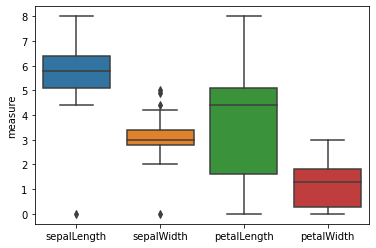

In [6]:
df.loc[df['sepalLength'].isnull(),'sepalLength'] = 0 # Reemplaso los valores nan por ceros
df.loc[df['sepalWidth'].isnull(),'sepalWidth'] = 0
df.loc[df['petalLength'].isnull(),'petalLength'] = 0
df.loc[df['petalWidth'].isnull(),'petalWidth'] = 0
sns.boxplot(data=df).set(ylabel='measure') # genero un gráfico boxplot, medición por cualidad

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [8]:
c1=(df['sepalLength']>=4.0)&(df['sepalLength']<=7.0) # valor de verdad de las flores que cumplen el largo y ancho de los petalos y sépalos
c2=(df['sepalWidth']>=2.0)&(df['sepalWidth']<=4.5)
c3=(df['petalLength']>=1.0)&(df['petalLength']<=7.0)
c4=(df['petalWidth']>=0.1)&(df['petalWidth']<=2.5)
rango=c1&c2&c3&c4  # genero una serie con los elementos de df que cumplen las condiciones especificadas
df.insert(5,'label',rango,True) # agrego la serie a mi base de datos con el nombre de label
df # muestro la base de datos con la columna nueva

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,False
1,7.2,3.6,6.1,2.5,virginica,False
2,6.3,3.3,6.0,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,True
146,4.8,3.0,1.4,0.1,setosa,True
147,4.9,3.1,1.5,0.1,setosa,True
148,4.9,3.6,1.4,0.1,setosa,True


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

<AxesSubplot:xlabel='sepalLength', ylabel='petalLength'>

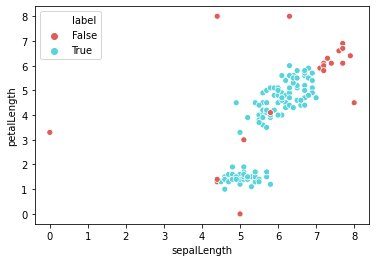

In [9]:
sns.scatterplot( #genero un gráfico del largo de sepalo x petalo separando los casos que cumplen las condiciones y que no
    x='sepalLength',
    y='petalLength',
    hue='label', #color por flores que cumplen y que no
    data=df,
    palette=sns.color_palette("hls", 2)
)   

<AxesSubplot:xlabel='sepalWidth', ylabel='petalWidth'>

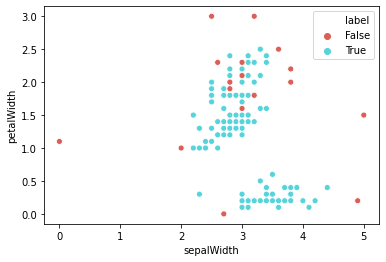

In [10]:
sns.scatterplot(  #genero un gráfico del ancho de sepalo x petalo separando los casos que cumplen las condiciones y que no
    x='sepalWidth',
    y='petalWidth',
    hue='label', #color por flores que cumplen y que no
    data=df,
    palette=sns.color_palette("hls", 2)
)   

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

<AxesSubplot:xlabel='sepalLength', ylabel='petalLength'>

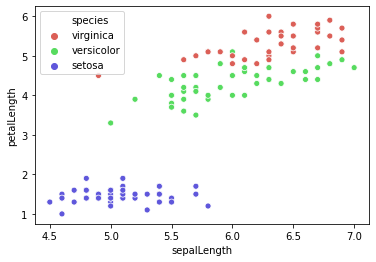

In [18]:
df = df.drop(df[df.label==False].index) # quito todos los valores que no cumplan las condiciones
df = df.drop(df[df.species=='default'].index) # quito todos los valores que tengan especie default
sns.scatterplot( # gráfico del largo sepalo x petalo de las tres especies que cumplen las condiciones dadas
    x='sepalLength',
    y='petalLength',
    hue='species', #color por flores que cumplen y que no
    data=df,
    palette=sns.color_palette("hls", 3)
)   